In [2]:
from sklearn.datasets import fetch_california_housing
data=fetch_california_housing()
data

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [3]:
import pandas as pd 
dataset=pd.DataFrame(data.data,columns=data.feature_names)
dataset["price"]=data.target
dataset.head()

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  price  
0    -122.23  4.526  
1    -122.22  3.585  
2    -122.24  3.521  
3    -122.25  3.413  
4    -122.25  3.422

In [4]:
x=pd.DataFrame(data.data,columns=data.feature_names)
y=data.target

In [5]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((16512, 8), (4128, 8), (16512,), (4128,))

In [6]:
from sklearn.preprocessing import StandardScaler
s=StandardScaler()
x_train_scaled=s.fit_transform(x_train)
x_test_scaled=s.transform(x_test)

<h3>apply linearRegression</h3>

In [7]:
from sklearn.linear_model import LinearRegression

In [8]:
l=LinearRegression()

l.fit(x_train_scaled,y_train)

LinearRegression()

In [9]:
y_pred=l.predict(x_test_scaled)
y_pred

array([0.71912284, 1.76401657, 2.70965883, ..., 4.46877017, 1.18751119,
       2.00940251])

In [10]:
y_test

array([0.477  , 0.458  , 5.00001, ..., 5.00001, 0.723  , 1.515  ])

In [11]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.575787706032451

C:\Users\wwrao\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


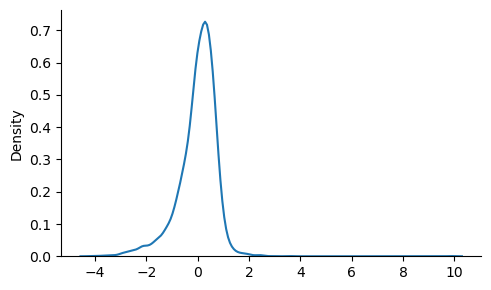

In [15]:
import seaborn as sns 
sns.displot(y_pred - y_test, kind="kde", height=3, aspect=1.67)


<h3>Using Ridge Regression or L2 Regression</h3>

In [16]:
from sklearn.linear_model import Ridge

In [17]:
r=Ridge()

In [18]:
r.fit(x_train_scaled,y_train)

Ridge()

In [19]:
y_pred1=r.predict(x_test_scaled)
y_pred1

array([0.71947224, 1.76384666, 2.709309  , ..., 4.46847645, 1.18797174,
       2.00922052])

In [20]:
r2_score(y_test,y_pred1)

0.5758157428913682

In [21]:

parameter = [0.01, 0.1, 1, 10, 100]
for alpha in parameter:
    ridge = Ridge(alpha=alpha)
    ridge.fit(x_train_scaled, y_train)
    r2_score = ridge.score(x_test_scaled, y_test)
    print(f"Alpha: {alpha}, R2 Score: {r2_score}")

Alpha: 0.01, R2 Score: 0.5757879873121596
Alpha: 0.1, R2 Score: 0.5757905180002313
Alpha: 1, R2 Score: 0.5758157428913682
Alpha: 10, R2 Score: 0.576059903284837
Alpha: 100, R2 Score: 0.5777912763033604


C:\Users\wwrao\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


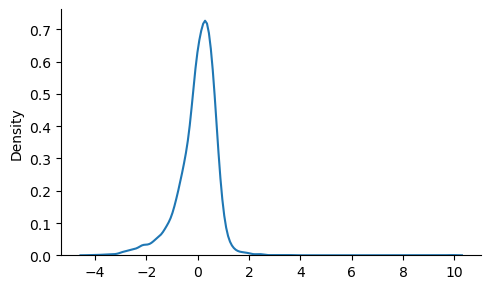

In [25]:

sns.displot(y_pred1 - y_test, kind="kde", height=3, aspect=1.67)

<h2>apply Lasso Rgression</h2>

In [54]:
from sklearn.model_selection import GridSearchCV
params = {'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10]}
lasso_cv = GridSearchCV(Lasso(), param_grid=params, scoring='r2', cv=5)
lasso_cv.fit(x_train_scaled, y_train)
print("Best Alpha:", lasso_cv.best_params_)

Best Alpha: {'alpha': 0.001}


In [55]:
from sklearn.linear_model import Lasso
Ls=Lasso(alpha=0.001)

In [56]:
Ls.fit(x_train_scaled,y_train)

Lasso(alpha=0.001)

In [57]:
y_pred2=Ls.predict(x_test_scaled)


In [58]:
r2_score(y_test,y_pred2)

0.5768562568705682

C:\Users\wwrao\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


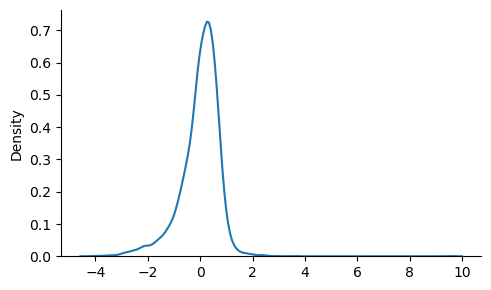

In [59]:
sns.displot(y_pred2 - y_test, kind="kde", height=3, aspect=1.67)